In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
tf.__version__


'2.10.0'

# RNN 이해하기

RNN의 input, output, weight을 이해해봅시다.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


### 문제1-1

모델 summary를 보고 생각해봅시다.
- input은 어떤 모양인가요?
- output은 어떤 모양인가요?
- weights 개수는?

In [ ]:
model = Sequential()
# timesteps=2, n_feature=10, hidden state = 5
model.add(SimpleRNN(5, input_shape=(2, 10)))

model.summary()
# Output Shape = (batch_size=None, n_feature=5)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 80        
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


### 문제1-2

모델 summary를 보고 생각해봅시다.
- input은 어떤 모양인가요?
- output은 어떤 모양인가요?
- weights 개수는?


In [ ]:
model = Sequential()
# return_sequences=False일때는 h1, h2, h3을 저장은 안하고 실제로 recursive 계산은 한다.
# 그래서 위에서 weight 갯수가 80인 것.
# false로 주면 many to one, true로 주면 many to many.
# 긍정/부정만 필요하면 many to one, 번역을 하거나 다음 char 예측하려면 many to many가 되어야 한다.
# timesteps=2, n_feature=10
model.add(SimpleRNN(5, input_shape=(2, 10), return_sequences=True))

model.summary()
# Output Shape = batch_size=None, timesteps=2, n_feature=5

# return_sequences=True 하니까 shape이 (2, 5)가 됨.
# hidden state 들을 저장하기 위해서 확보하는것. h1, h2, h3... 저장
# batch size는 한번에 처리할 문장의 갯수.
# timestep은 문장의 토큰 수.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 2, 5)              80        
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


### 문제 1-3

모델 summary를 보고 생각해봅시다.
- input은 어떤 모양인가요?
- output은 어떤 모양인가요?
- weights 개수는?


In [ ]:
model = Sequential()
# input_shape -> batch_input_shape으로 되었다. 그냥 batch size를 함께 주는 것.
# batch_size=8, timesteps=2, n_feature=10
model.add(SimpleRNN(5, batch_input_shape=(8, 2, 10)))
model.summary()
# Output Shape = batch_size=8, n_feature=5
# return_sequences를 주지 않았기 때문에 (8, 2, 5)로 표출되지 않는다


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 5)                    80        
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


### 문제  1-4

모델 summary를 보고 생각해봅시다.
- input은 어떤 모양인가요?
- output은 어떤 모양인가요?
- weights 개수는?


In [ ]:
model = Sequential()

# batch_size=8, timesteps=2, n_feature=10
model.add(SimpleRNN(5, batch_input_shape=(8, 2, 10), return_sequences=True))
model.summary()
# Output Shape = batch_size=8, timesteps=2, n_feature=5
# return_sequences를 줬기 때문에 (8, 2, 5)로 표출되지 않는다


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (8, 2, 5)                 80        
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


### 문제 1-5

output layer를 추가하겠습니다. 그럼 weights의 개수는?

In [ ]:
model = Sequential()
model.add(SimpleRNN(5, input_shape=(2, 10)))
# simplernn의 outputshape 5, dense 1이니까 bias 포함 weight 갯수는 6
model.add(Dense(1))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 5)                 80        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________


### 다층 RNN

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(7, input_shape=(100, 5), return_sequences=True))
model.add(SimpleRNN(3))
model.add(Dense(1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100, 7)            91        
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 3)                 33        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


위의 summary를 보고 직접 계산해보세요

Wx =   
Wh =  
bh =

# RNN 구현하기

- Keras RNN : https://keras.io/api/layers/recurrent_layers/simple_rnn/

### 1. 단층 Simple RNN

우선 RNN과 LSTM을 테스트하기 위한 임의의 입력을 만듭니다.

In [ ]:
# 단어 벡터
John = [1, 0, 0, 0]
loves = [0, 1, 0, 0]
cats = [0, 0, 1, 0]
dogs = [0, 0, 0, 1]


In [ ]:
# X 데이터

train_X = np.array([
    [John, loves, cats],
    [John, loves, dogs]
]).astype(np.float32)


In [ ]:
# 타겟 벡터

S = [0]  # subject
V = [1]  # verb
O = [2]  # object

idx2tag = ['S', 'V', 'O']


In [ ]:
# Y 데이터
train_Y = np.array([[S, V, O], [S, V, O]]).astype(np.float32)

print("train_y", train_Y)
print("train_X의 shape", train_X.shape)
print("train_Y의 shape", train_Y.shape)


train_y [[[0.]
  [1.]
  [2.]]

 [[0.]
  [1.]
  [2.]]]
train_X의 shape (2, 3, 4)
train_Y의 shape (2, 3, 1)


- 단어 벡터의 차원은?
- 문장의 길이는?
- output 클래스 개수는?

In [22]:
from tensorflow.keras import layers, models

model = models.Sequential()  # 모델 호출
model.add(layers.SimpleRNN(3,
                           input_shape=(3, 4),
                           return_sequences=True,
                           name='SimpleRNN-1'))  # RNN 호출

model.add(layers.Dense(3,
                       activation='softmax',
                       name='hidden-to-output'))  # 출력을 위한 FFN

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam')


In [ ]:
model.fit(train_X, train_Y, epochs=50)


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.1265
Epoch 2/50
1/1 [==============================] - 0s 17ms/step - loss: 1.1234
Epoch 3/50
1/1 [==============================] - 0s 16ms/step - loss: 1.1203
Epoch 4/50
1/1 [==============================] - 0s 15ms/step - loss: 1.1172
Epoch 5/50
1/1 [==============================] - 0s 13ms/step - loss: 1.1140
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 1.1109
Epoch 7/50
1/1 [==============================] - 0s 16ms/step - loss: 1.1078
Epoch 8/50
1/1 [==============================] - 0s 17ms/step - loss: 1.1046
Epoch 9/50
1/1 [==============================] - 0s 14ms/step - loss: 1.1015
Epoch 10/50
1/1 [==============================] - 0s 18ms/step - loss: 1.0984
Epoch 11/50
1/1 [==============================] - 0s 13ms/step - loss: 1.0952
Epoch 12/50
1/1 [==============================] - 0s 17ms/step - loss: 1.0921
Epoch 13/50
1/1 [==============================] - 0s 11ms/step

In [ ]:
predictions = model.predict(train_X)

for i, prediction in enumerate(predictions):
    print(prediction)
    print(np.argmax(prediction, axis=1))

    result_str = [idx2tag[c] for c in np.argmax(prediction, axis=1)]

    print("\tPrediction str: ", "".join(result_str), end='\n\n\n')


1/1 [==============================] - 0s 221ms/step
[[0.33519685 0.3826685  0.28213456]
 [0.29639    0.46468556 0.23892438]
 [0.27342546 0.5427039  0.18387066]]
[1 1 1]
	Prediction str:  VVV


[[0.33519685 0.3826685  0.28213456]
 [0.29639    0.46468556 0.23892438]
 [0.35629258 0.2494141  0.39429334]]
[1 1 2]
	Prediction str:  VVO




In [ ]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 SimpleRNN-1 (SimpleRNN)     (None, 3, 3)              24        
                                                                 
 hidden-to-output (Dense)    (None, 3, 3)              12        
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


실제로 weight의 개수를 확인해봅시다.

In [ ]:
for model_weight in model.weights:
    print(model_weight.name, '=>', model_weight.shape)


SimpleRNN-1/simple_rnn_cell_14/kernel:0 => (4, 3)
SimpleRNN-1/simple_rnn_cell_14/recurrent_kernel:0 => (3, 3)
SimpleRNN-1/simple_rnn_cell_14/bias:0 => (3,)
hidden-to-output/kernel:0 => (3, 3)
hidden-to-output/bias:0 => (3,)


### 2. 다층 Simple RNN

임의의 시계열 데이터를 생성하겠습니다.

In [4]:
import numpy as np
# 파동을 가지고 있는 시계열성 데이터 생성
# 앞부분 학습시켜서 뒷부분 예측
data = np.sin(2*np.pi*np.arange(0, 1000))*10 + np.random.random(1000)
data.shape


(1000,)

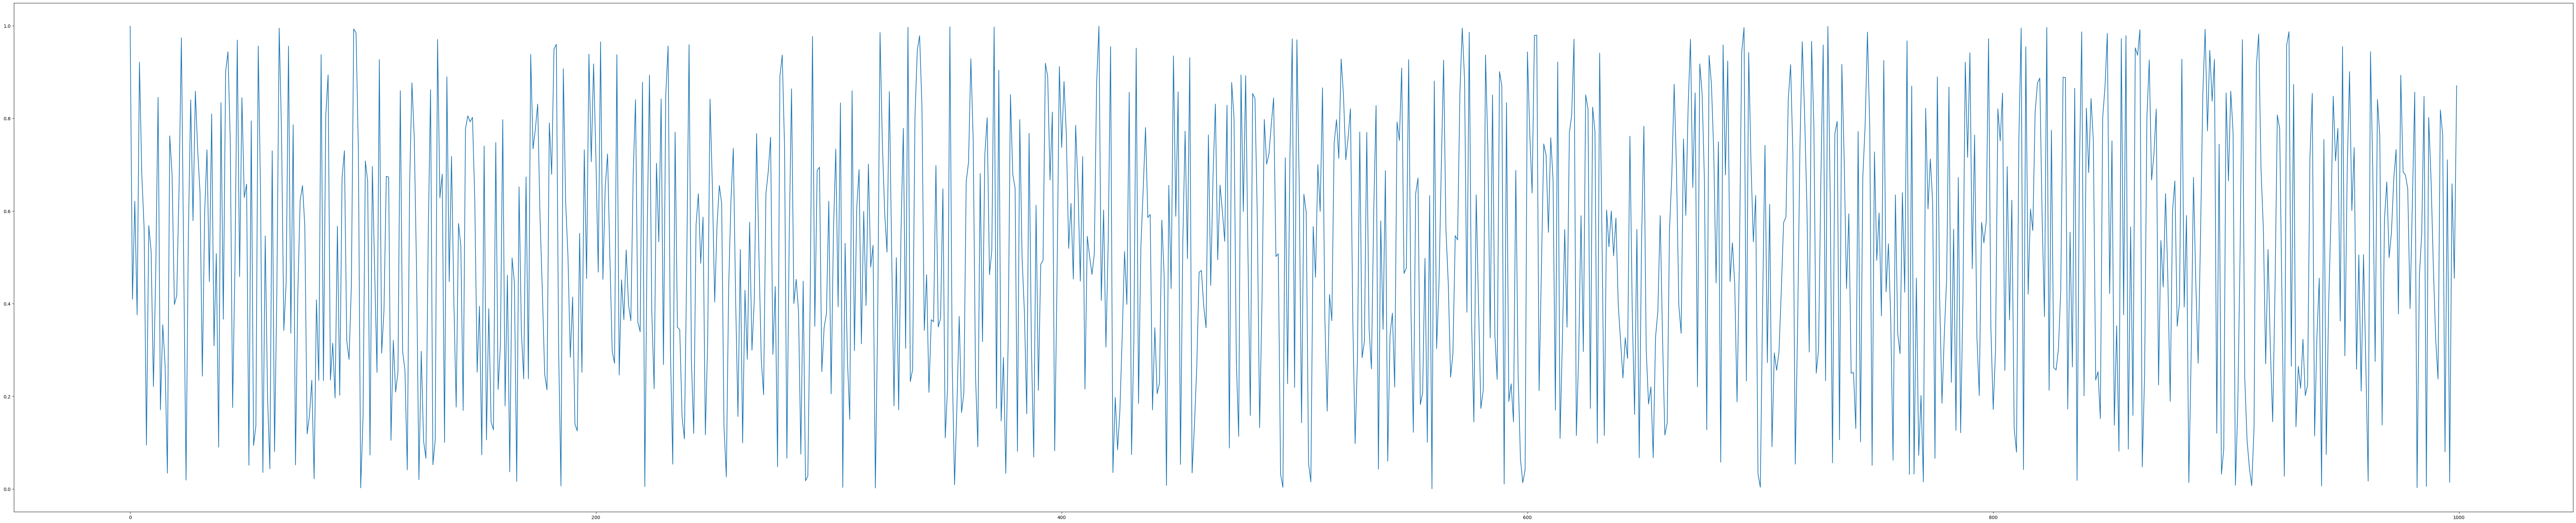

In [5]:
plt.figure(figsize=[100, 20])
plt.plot(np.arange(0, 1000), data)
plt.show()


In [6]:
from sklearn.model_selection import train_test_split


X, y 데이터 생성하기

다음으로, 해당 샘플 데이터를 1칸씩 이동하며 10개씩 데이터를 잘라, x값으로 사용하고, y값은 11번째 데이터로 사용하겠습니다.  
예) x = 1번째 ~ 10번째 데이터 / y = 11번째   
   x = 2번째 ~ 11번째 데이터 / y = 12번째

질문) 길이가 1000인 data를 이용해, 몇 쌍의 x, y 데이터를 만들어낼 수 있을까요?


In [17]:
# 내포 : 제어문을 자료구조 안에 넣는다. 왜? 편하게 자료구조 만들려고.
x_sin = np.array([[[data[i+j]] for j in range(10)]
                 for i in range(len(data)-10)])
y_sin = np.array([[data[i+10]] for i in range(len(data)-10)])
x_sin.shape, y_sin.shape


((990, 10, 1), (990, 1))

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x_sin, y_sin, test_size=0.25, random_state=42)


In [18]:
# shuffle = False로 명시하면, 데이터셋 순차적으로 split
# 시계열성 데이터는 보통 shuffle 하지 않는다. 순서가 있고 미래의 데이터를 예측하는거니까.
# 비율 주지 않으면 알아서 3:1로 쪼개진다.
x_train, x_test, y_train, y_test = train_test_split(
    x_sin, y_sin, shuffle=False)


In [19]:
x_train.shape, x_test.shape, y_train.shape


((742, 10, 1), (248, 10, 1), (742, 1))

### 모델 작성.
1. layer1: SimpleRNN 8
2. layer2: SimpleRNN 8
3. layer3: SimpleRNN 4
4. output_layer:  Dense 1 # 값이 하나 ManyToOne

In [23]:
model = models.Sequential()

# 다층 LSTM
model.add(SimpleRNN(8, input_shape=(10, 1),
          return_sequences=True, name='SimpleRNN-1'))
model.add(SimpleRNN(8, return_sequences=True, name='SimpleRNN-2'))
model.add(SimpleRNN(4, name='SimpleRNN-3'))

model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(x_train, y_train, epochs=10, verbose=1)


Epoch 1/10
24/24 [==============================] - 2s 5ms/step - loss: 0.0993
Epoch 2/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0798
Epoch 3/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0798
Epoch 4/10
24/24 [==============================] - 0s 4ms/step - loss: 0.0797
Epoch 5/10
24/24 [==============================] - 0s 4ms/step - loss: 0.0797
Epoch 6/10
24/24 [==============================] - 0s 4ms/step - loss: 0.0794
Epoch 7/10
24/24 [==============================] - 0s 4ms/step - loss: 0.0794
Epoch 8/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0793
Epoch 9/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0795
Epoch 10/10
24/24 [==============================] - 0s 5ms/step - loss: 0.0791


In [ ]:
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn-1 (SimpleRNN)           (None, 10, 8)             80        
                                                                 
 rnn-2 (SimpleRNN)           (None, 10, 8)             136       
                                                                 
 rnn-3 (SimpleRNN)           (None, 4)                 52        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


- unit: 노드의 개수 (= 아웃풋 공간의 차원)
- (layer 1) Wx + Wh + b =
- (layer 2) Wx + Wh + b =
- (layer 3) Wx + Wh + b =


In [25]:
for model_weight in model.weights:
    print(model_weight.name, '=>', model_weight.shape)


simple_rnn_2/simple_rnn_cell_3/kernel:0 => (1, 8)
simple_rnn_2/simple_rnn_cell_3/recurrent_kernel:0 => (8, 8)
simple_rnn_2/simple_rnn_cell_3/bias:0 => (8,)
simple_rnn_3/simple_rnn_cell_4/kernel:0 => (8, 8)
simple_rnn_3/simple_rnn_cell_4/recurrent_kernel:0 => (8, 8)
simple_rnn_3/simple_rnn_cell_4/bias:0 => (8,)
simple_rnn_4/simple_rnn_cell_5/kernel:0 => (8, 4)
simple_rnn_4/simple_rnn_cell_5/recurrent_kernel:0 => (4, 4)
simple_rnn_4/simple_rnn_cell_5/bias:0 => (4,)
dense_1/kernel:0 => (4, 1)
dense_1/bias:0 => (1,)


In [ ]:
model.weights


##### 학습결과

In [26]:
y_hat = model.predict(x_test)  # 테스트값 예측


8/8 [==============================] - 0s 2ms/step


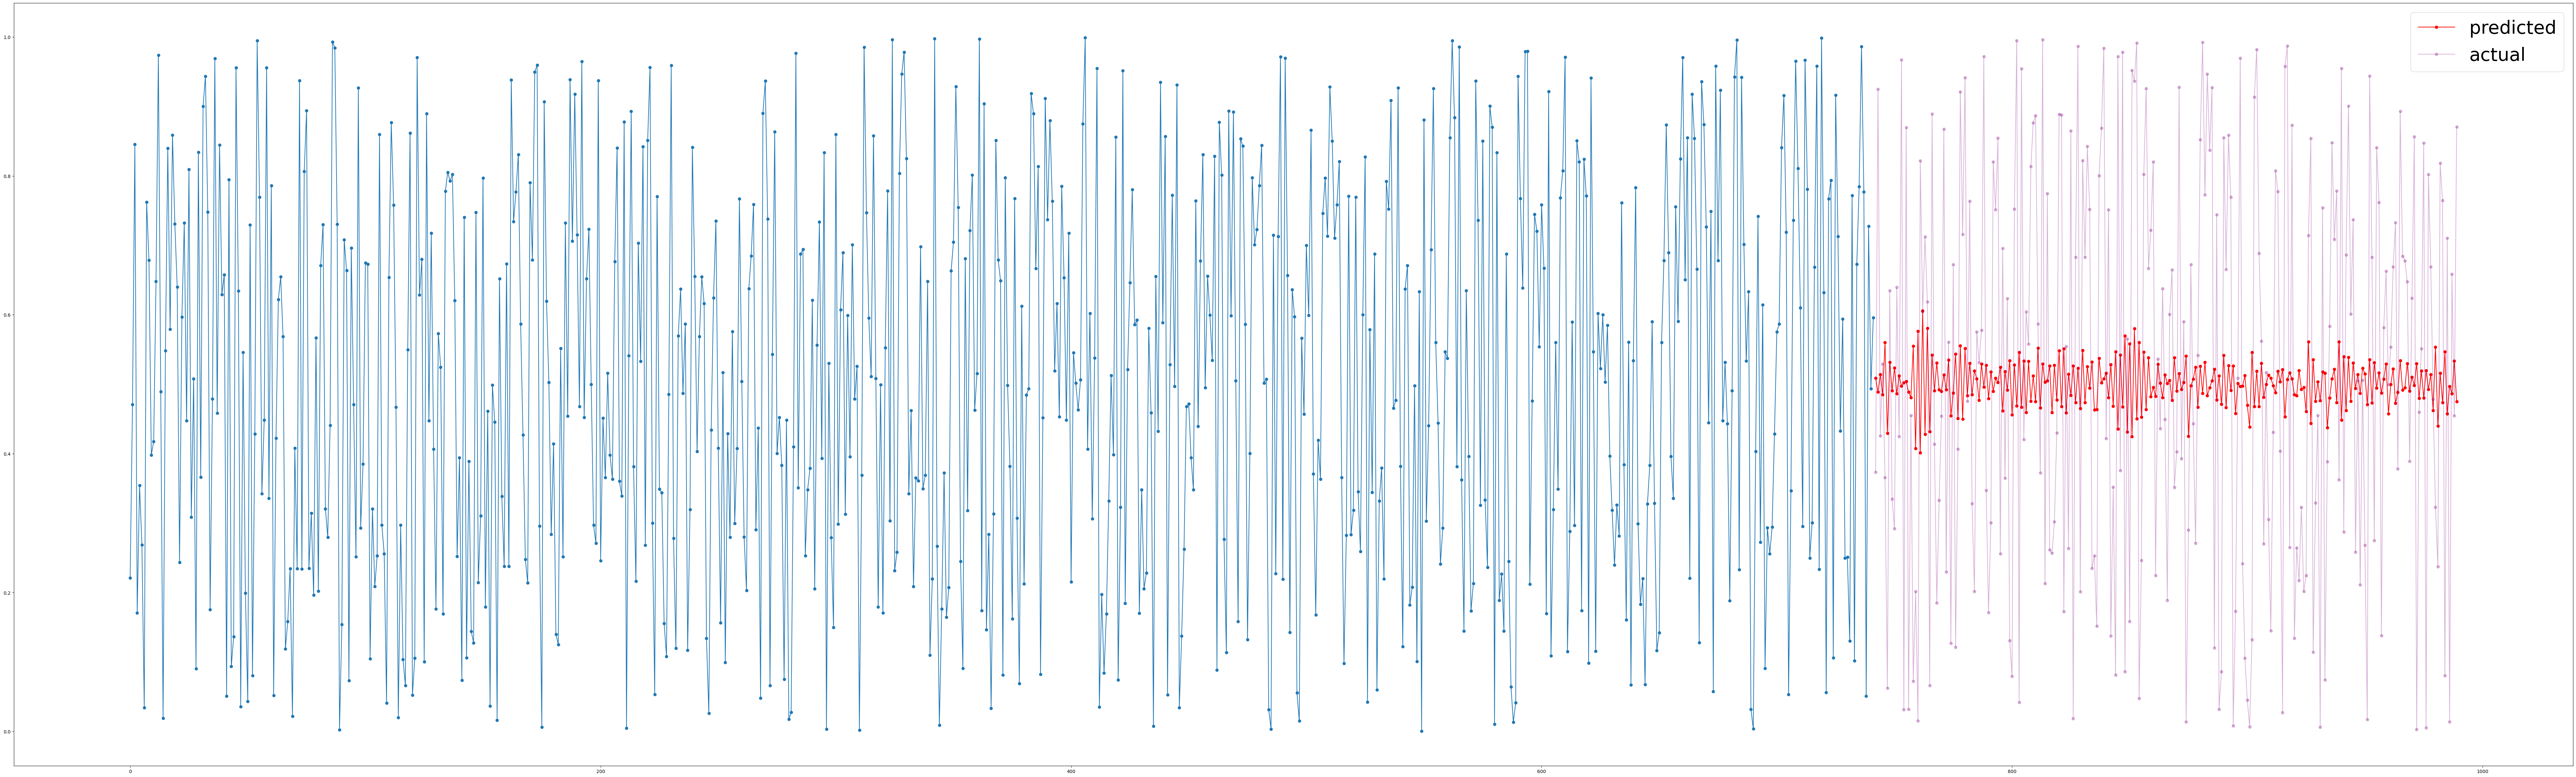

In [27]:
y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train)+len(y_hat))

plt.figure(figsize=(100, 30))
# Train 데이터 그래프로 표현
plt.plot(y_axis, y_train.reshape(len(x_train),), '-o')
plt.plot(y_2_axis, y_hat.reshape(len(x_test),),
         '-o', color='red', label='predicted')
plt.plot(y_2_axis, y_test.reshape(len(x_test),), '-o',
         color='purple', alpha=0.3, label='actual')
plt.legend(fontsize=40)
plt.show()


### reference

- https://github.com/ukairia777/tensorflow-nlp-tutorial/blob/main/08.%20RNN/8-4.%20understanding_simplernn_and_lstm.ipynb